# Simulation using CTA IRFs

- Intrinsic spectrum assumed to be extrapolation of the Fermi-LAT spectrum (showing example of `gammapy.catalog`)
- Add EBL absorpsion
- Simulated CTA DL4 data

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord
from gammapy.irf import load_cta_irfs
from gammapy.maps import WcsGeom, MapAxis
from gammapy.modeling.models import (
    PowerLawSpectralModel,
    PointSpatialModel,
    SkyModel,
    Models,
    FoVBackgroundModel,
    EBLAbsorptionNormSpectralModel
)

from feupy.utils.string_handling import name_to_txt

In [3]:

from gammapy.makers import MapDatasetMaker, SafeMaskMaker
from gammapy.modeling import Fit
from gammapy.data import Observation
from gammapy.datasets import MapDataset, Datasets

from gammapy.catalog import SourceCatalog4FGL

from feupy.plotters import setting_leg_style, show_hist_counts

from feupy.utils.geometry import *
from feupy.utils.observation import *
from feupy.utils.datasets import flux_points_dataset_from_table

from feupy.analysis.config import AnalysisConfig
from feupy.analysis.core import Analysis


/home/born-again/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/pydantic/_migration.py:290: UserWarning: `pydantic.utils:deep_update` has been removed. We are importing from `pydantic.v1.utils:deep_update` instead.See the migration guide for more details: https://docs.pydantic.dev/latest/migration/
  warnings.warn(


In [4]:
from feupy.catalog import CATALOG_REGISTRY

## Use gammapy.catalog to find the Fermi spectrum
- see https://docs.gammapy.org/0.19/tutorials/api/catalog.html for details

In [5]:
source_name = 'NGC 1275'
name_file = name_to_txt(source_name)
position = SkyCoord.from_name(source_name)

In [6]:
catalog = CATALOG_REGISTRY.get_cls("gamma-cat")()
source = catalog[source_name]
print(source.info())


*** Basic info ***

Catalog row index (zero-based): 16
Common name: NGC 1275
Gamma names: --
Fermi names: --
Other names: --
Location: egal
Class: fri

TeVCat ID: 212
TeVCat 2 ID: 9dfnMH
TeVCat name: TeV J0319+415

TGeVCat ID: 18
TGeVCat name: TeV J0319+4130

Discoverer: magic
Discovery date: 2010-10
Seen by: magic
Reference: --

*** Position info ***

SIMBAD:
RA: 49.951 deg
DEC: 41.512 deg
GLON: 150.576 deg
GLAT: -13.261 deg

Measurement:
RA: 0.000 deg
DEC: 0.000 deg
GLON: 0.000 deg
GLAT: 0.000 deg
Position error: 0.000 deg

*** Morphology info ***

Morphology model type: none
Sigma: 0.000 deg
Sigma error: 0.000 deg
Sigma2: 0.000 deg
Sigma2 error: 0.000 deg
Position angle: 0.000 deg
Position angle error: 0.000 deg
Position angle frame: --

*** Spectral info ***

Significance: --
Livetime: 0.000 h

Spectrum type: none

Energy range: (0.0, 0.0) TeV
theta: 0.0 deg


Derived fluxes:
Spectral model norm (1 TeV): 0.0 1 / (TeV s cm2) +- 0.0 1 / (TeV s cm2) (stat) cm-2 s-1 TeV-1
Integrated f

/home/born-again/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/gammapy/catalog/gammacat.py:124: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  ss += f"Significance: {d.significance:.3f}\n"
/home/born-again/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/gammapy/catalog/gammacat.py:155: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  ss += f"Integrated flux (>1 TeV): {d.spec_flux_1TeV_crab:.3f} +- {d.spec_flux_1TeV_crab_err:.3f} (% Crab)\n"  # noqa: E501


In [7]:
#catalog.table

In [8]:
config = AnalysisConfig()
outdir = f"./{name_file}"
datasets_path = f"{outdir}/datasets/"
config.general.outdir = outdir
config.general.datasets_file = f"{datasets_path}/datasets.yaml"
config.general.models_file = f"{datasets_path}/models.yaml"

In [9]:
analysis = Analysis(config)


Setting logging config: {'level': 'INFO', 'filename': None, 'filemode': None, 'format': None, 'datefmt': None}


In [10]:
analysis.read_datasets()

No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point 

Models loaded from NGC_1275/datasets/models.yaml.


In [11]:
datasets_HE = Datasets([analysis.datasets[0],analysis.datasets[1],analysis.datasets[2],analysis.datasets[3]])

In [12]:
print(datasets_HE)

Datasets
--------

Dataset 0: 

  Type       : FluxPointsDataset
  Name       : 3FGL J0319.8+4130
  Instrument : 
  Models     : ['3FGL_J0319.8+4130_lp', 'model-fit']

Dataset 1: 

  Type       : FluxPointsDataset
  Name       : 4FGL J0319.8+4130
  Instrument : 
  Models     : ['model-fit', '4FGL_J0319.8+4130_lp']

Dataset 2: 

  Type       : FluxPointsDataset
  Name       : 2FHL J0319.8+4131
  Instrument : 
  Models     : ['model-fit', '2FHL_J0319.8+4131_pl-2']

Dataset 3: 

  Type       : FluxPointsDataset
  Name       : 3FHL J0319.8+4130
  Instrument : 
  Models     : ['model-fit', '3FHL_J0319.8+4130_pl']




In [13]:
sky_model = datasets_HE.models['model-fit']

In [14]:
print(sky_model)

SkyModel

  Name                      : model-fit
  Datasets names            : None
  Spectral model type       : LogParabolaSpectralModel
  Spatial  model type       : 
  Temporal model type       : 
  Parameters:
    amplitude@PaB1o2b0            :   3.89e-11   +/- 2.9e-13 1 / (MeV s cm2)
    reference@OR-ulGQO    (frozen):    917.981       MeV         
    alpha@aU8jcIjK                :      1.961   +/-    0.01             
    beta@NeB_ur4P                 :      0.097   +/-    0.00             




<Axes: xlabel='Energy [$\\mathrm{MeV}$]', ylabel='e2dnde [$\\mathrm{erg\\,s^{-1}\\,cm^{-2}}$]'>

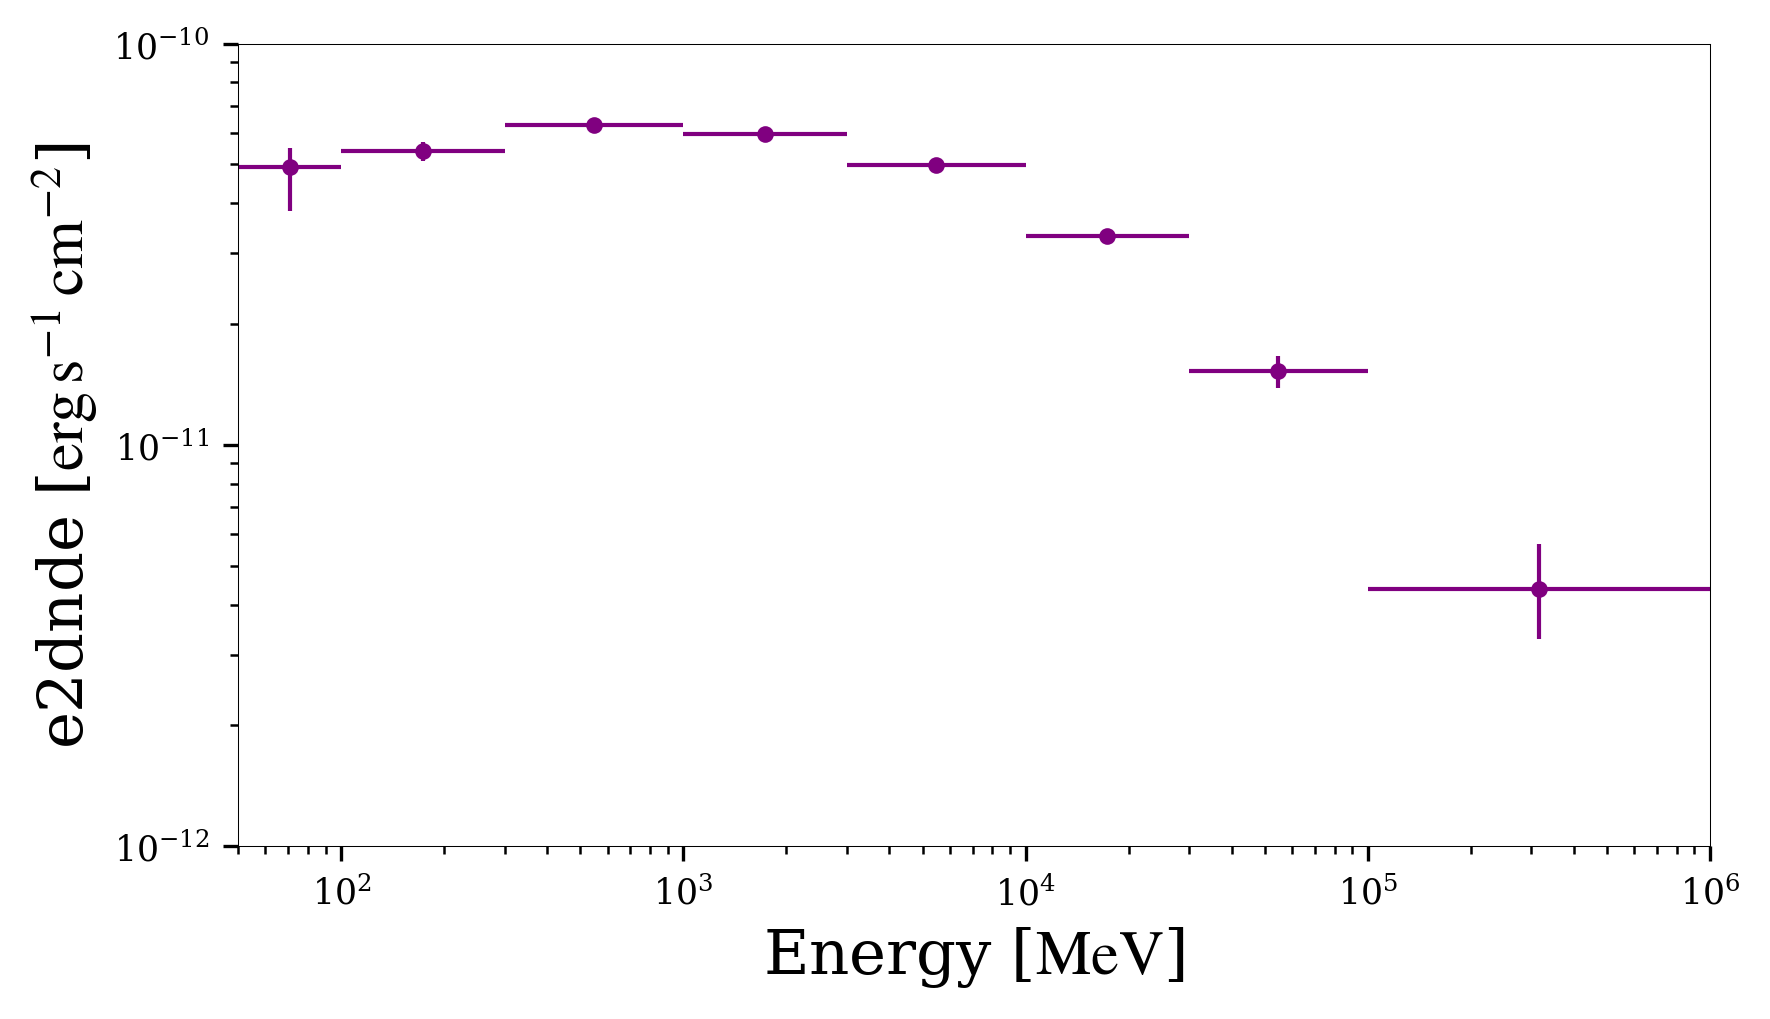

In [15]:
datasets_HE['4FGL J0319.8+4130'].data.plot(sed_type="e2dnde")

## Now, simulate for CTA using the above model

### Create a fake observation defining observation conditions

In [16]:
from feupy.cta.irfs import Irfs
irfs_config = Irfs.IRFS_OPTIONS
irfs_config

# Loading IRFs
irfs_config_ =['North', 'AverageAz', '20deg', '50h']
irfs = Irfs.get_irfs(irfs_config_)
obs_location = Irfs.get_obs_loc(irfs_config)
irfs_label = Irfs.get_irfs_label(irfs_config_)

In [17]:
# irfs = load_cta_irfs(
#     "$GAMMAPY_DATA/cta-1dc/caldb/data/cta/1dc/bcf/South_z20_50h/irf_file.fits"
# )


In [18]:
# Define the observation parameters (typically the observation duration and the pointing position):
livetime = 2.0 * u.hr
target_position = source.position

In [19]:
# pointing_angle = 0*u.deg
# config.observations.pointing_angle = pointing_angle
offset = 0.5*u.deg 
# config.observations.parameters.offset = offset

pointing = target_position
# pointing_position = create_pointing_position(target_position, pointing_angle, offset)
# pointing = create_pointing(pointing_position)
# print(f"{pointing}\n")

In [20]:
# Define map geometry for binned simulation
energy_reco = MapAxis.from_edges(
    np.logspace(-1.0, 1.0, 10), unit="TeV", name="energy", interp="log"
)
geom = WcsGeom.create(
    skydir=source.position,
    binsz=0.02,
    width=(3, 3),
    frame="icrs",
    axes=[energy_reco],
)
# It is usually useful to have a separate binning for the true energy axis
energy_true = MapAxis.from_edges(
    np.logspace(-1.5, 1.5, 30), unit="TeV", name="energy_true", interp="log"
)

empty = MapDataset.create(
    geom, name="dataset-simu", energy_axis_true=energy_true
)

### Define model to simulate the data

- intrinsic model from the 4FGL
- EBL model (see: https://docs.gammapy.org/0.19/modeling/gallery/spectral/plot_absorbed.html?highlight=ebl)

In [21]:
int_model = sky_model.spectral_model
print(int_model)

LogParabolaSpectralModel

  type      name     value    ... frozen is_norm        link       
-------- --------- ---------- ... ------ ------- ------------------
spectral amplitude 3.8931e-11 ...  False    True amplitude@PaB1o2b0
spectral reference 9.1798e+02 ...   True   False reference@OR-ulGQO
spectral     alpha 1.9613e+00 ...  False   False     alpha@aU8jcIjK
spectral      beta 9.6899e-02 ...  False   False      beta@NeB_ur4P


In [22]:
redshift = 0.116
ebl = EBLAbsorptionNormSpectralModel.read_builtin("dominguez", redshift=redshift)

In [23]:
spectral_model = ebl * int_model
spatial_model = sky_model.spatial_model
model_simu = SkyModel(spectral_model=spectral_model, 
                      spatial_model=spatial_model,
                      name="model-simu")

In [24]:
bkg_model = FoVBackgroundModel(dataset_name="dataset-simu")

In [25]:
models = Models([model_simu, bkg_model])
print(models)

Models

Component 0: SkyModel

  Name                      : model-simu
  Datasets names            : None
  Spectral model type       : CompoundSpectralModel
  Spatial  model type       : 
  Temporal model type       : 
  Parameters:
    alpha_norm            (frozen):      1.000                   
    redshift              (frozen):      0.116                   
    amplitude@PaB1o2b0            :   3.89e-11   +/- 2.9e-13 1 / (MeV s cm2)
    reference@OR-ulGQO    (frozen):    917.981       MeV         
    alpha@aU8jcIjK                :      1.961   +/-    0.01             
    beta@NeB_ur4P                 :      0.097   +/-    0.00             

Component 1: FoVBackgroundModel

  Name                      : dataset-simu-bkg
  Datasets names            : ['dataset-simu']
  Spectral model type       : PowerLawNormSpectralModel
  Parameters:
    norm                          :      1.000   +/-    0.00             
    tilt                  (frozen):      0.000                   
    

### Now, perform a simulation

In [26]:
# Create an in-memory observation
obs = Observation.create(pointing=pointing, livetime=livetime, irfs=irfs, location=obs_location)
print(obs)

Observation

	obs id            : 0 
 	tstart            : 51544.00
	tstop             : 51544.08
	duration          : 7200.00 s
	pointing (icrs)   : 50.0 deg, 41.5 deg

	deadtime fraction : 0.0%



/home/born-again/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/gammapy/data/observations.py:226: GammapyDeprecationWarning: Pointing will be required to be provided as FixedPointingInfo
  warnings.warn(


In [27]:
# Make the MapDataset
maker = MapDatasetMaker(selection=["exposure", "background", "psf", "edisp"])

maker_safe_mask = SafeMaskMaker(methods=["offset-max"], offset_max=4.0 * u.deg)

dataset = maker.run(empty, obs)
dataset = maker_safe_mask.run(dataset, obs)
print(dataset)

MapDataset
----------

  Name                            : dataset-simu 

  Total counts                    : 0 
  Total background counts         : 42243.04
  Total excess counts             : -42243.04

  Predicted counts                : 42243.04
  Predicted background counts     : 42243.04
  Predicted excess counts         : nan

  Exposure min                    : 5.81e+07 m2 s
  Exposure max                    : 7.62e+09 m2 s

  Number of total bins            : 202500 
  Number of fit bins              : 202500 

  Fit statistic type              : cash
  Fit statistic value (-2 log(L)) : nan

  Number of models                : 0 
  Number of parameters            : 0
  Number of free parameters       : 0




In [28]:
#Add the model on the dataset and Poission fluctuate
dataset.models = models
dataset.fake()
# Do a print on the dataset - there is now a counts maps
print(dataset)

ValueError: cannot reshape array of size 29 into shape (29,150,150)

In [ ]:
dataset.excess.smooth(0.05 * u.deg).plot_interactive(
    add_cbar=True, stretch="linear"
)

In [ ]:
dataset.counts

In [ ]:
dataset.counts.sum_over_axes().plot(add_cbar=True)

In [ ]:
dataset.counts.get_image_by_coord({"energy": "5 TeV"})

In [ ]:
# datasets = Datasets(dataset)
# datasets.write(filename=f'datasets_pks2155-simulated.fits', filename_models=f'models_pks2155-simulated.fits', overwrite=True)

In [ ]:
dataset.write("pks2155-simulated.fits.gz", overwrite=True)